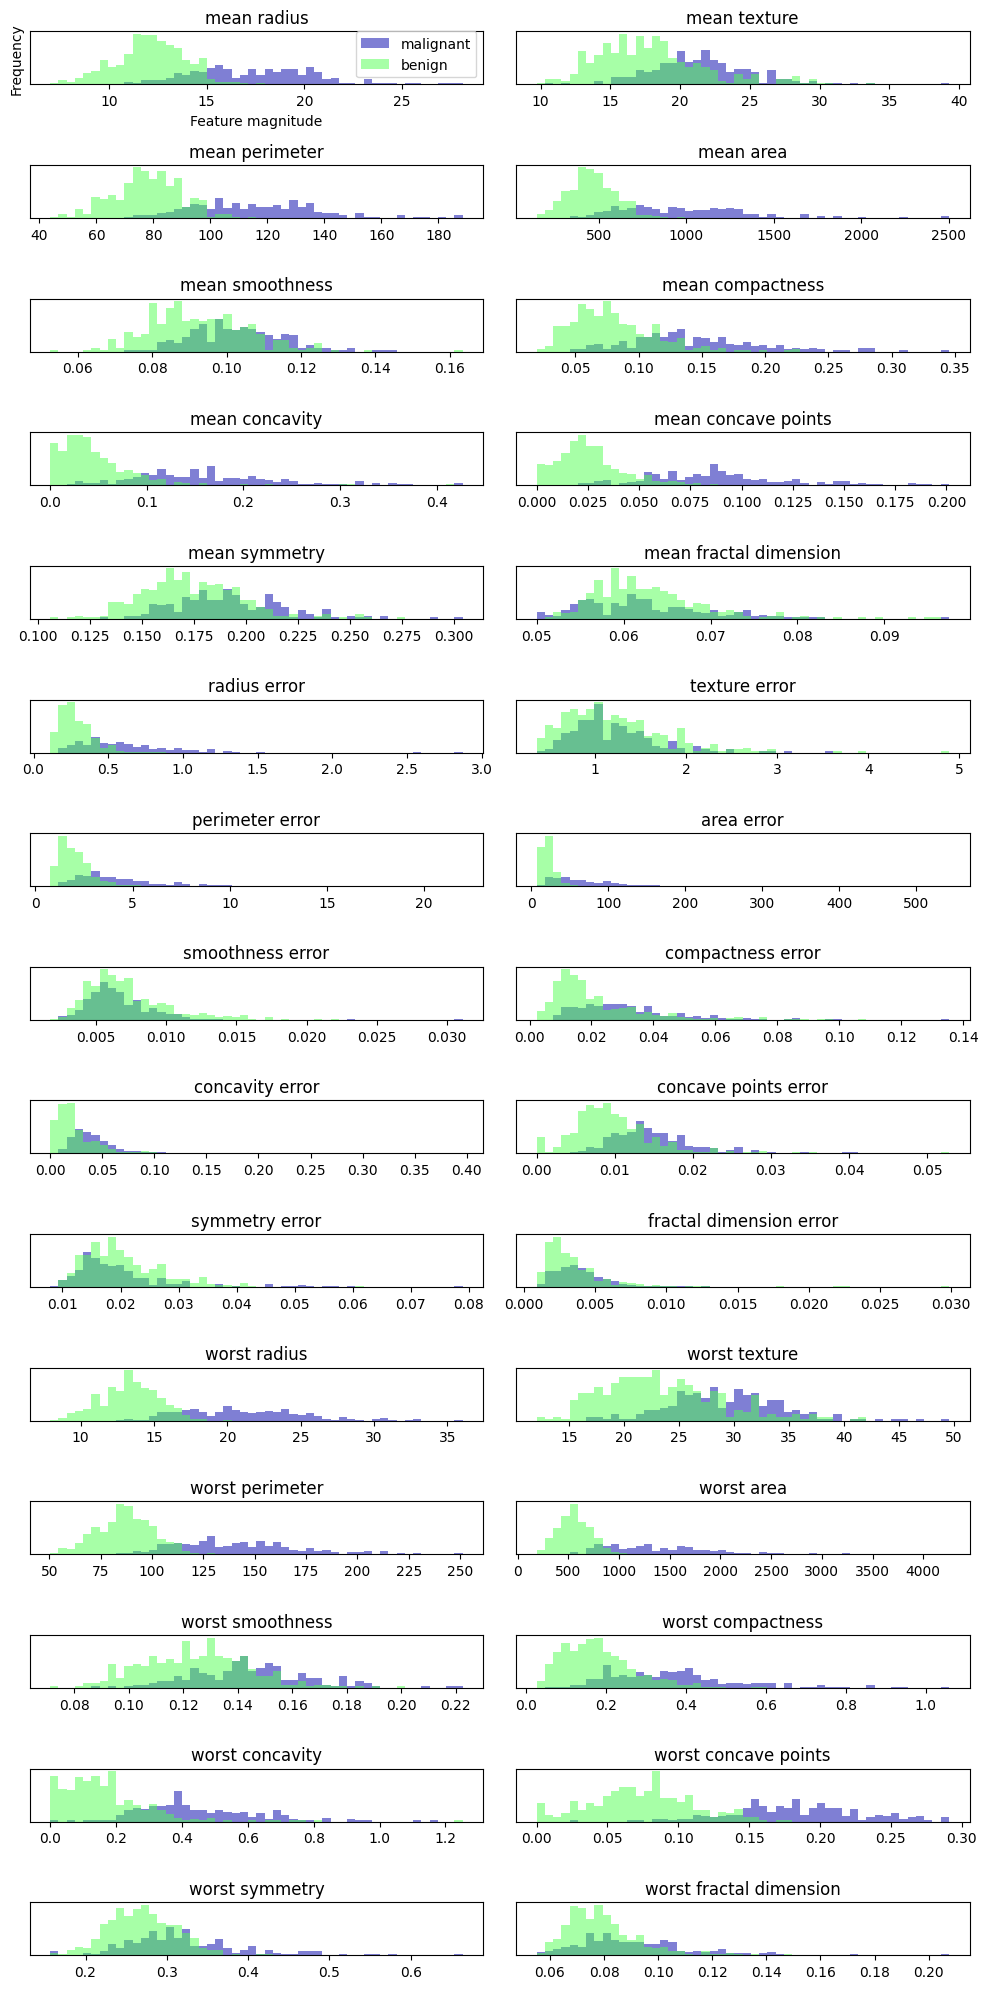

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

# Steps for PCA

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [4]:
X_pca = pca.transform(X_scaled)

print("Original shape:", str(X_scaled.shape))
print("Reduced shape:", str(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [5]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Secoond principal component')

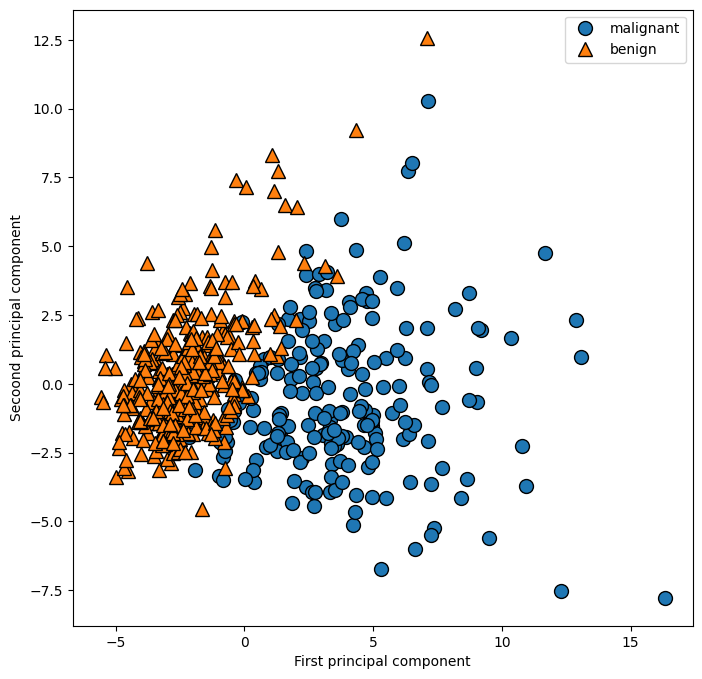

In [6]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignant", "benign"], loc="best")
plt.xlabel("First principal component")
plt.ylabel("Secoond principal component")

In [7]:
print("PCA component shape:", pca.components_.shape)

PCA component shape: (2, 30)


In [8]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0, 0.5, 'Principal components')

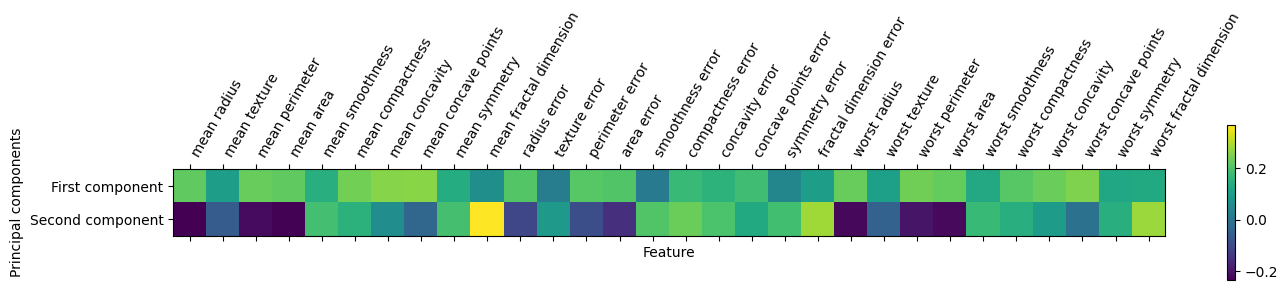

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# Phishing Site Detection Example

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('dataset_phishing.csv')

In [12]:
len(df)

88647

In [13]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [14]:
df_X = df.drop(columns=['phishing'])
df_y = df['phishing']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled.shape

(66485, 111)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

print('Train Score: {:.3f}'.format(knn.score(X_train_scaled, y_train)))
print('Test Score: {:.3f}'.format(knn.score(X_test_scaled, y_test)))

Train Score: 0.975
Test Score: 0.953


In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
print('Train Score: {:.5f}'.format(lr.score(X_train_scaled, y_train)))
print('Test Score: {:.5f}'.format(lr.score(X_test_scaled, y_test)))

Train Score: 0.93362
Test Score: 0.93259


#### pca

In [22]:
pca=PCA(n_components=6, random_state=0).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [23]:
X_train_pca.shape

(66485, 6)

In [24]:
pca.components_

array([[ 5.27963439e-02,  5.31149562e-02,  5.32878141e-02,
         1.31832992e-01,  3.34006489e-02,  8.00642107e-02,
         3.19711646e-02,  6.24188721e-02,  1.04048134e-02,
         3.73941568e-03,  1.08667489e-02,  1.11576746e-02,
         9.38031990e-03,  1.22633776e-02,  1.66708580e-03,
         1.12543884e-02,  2.48643315e-02,  5.23807198e-02,
         1.08923151e-01, -3.70665126e-02,  1.34742387e-02,
        -2.06602262e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.17687932e-02, -6.14713300e-03,  7.68821849e-03,
        -1.35947135e-03,  1.41580193e-01,  1.07056802e-01,
         1.37591364e-01,  1.43473233e-01,  1.61203404e-01,
         1.58471336e-01,  1.46760191e-01,  1.52832928e-01,
         1.60381585e-01,  1.59865956e-01,  1.59682971e-0

In [25]:
pca.components_.shape

(6, 111)

In [26]:
X_test_pca.shape

(22162, 6)

In [27]:
X_test_pca

array([[ 3.966235  , -3.46713   , -0.54196013,  0.78888484,  0.9797164 ,
         0.35136503],
       [-5.13521583,  1.0645415 ,  0.07803777,  0.68303775, -0.2638831 ,
         0.43724364],
       [ 4.10334671, -3.37563372, -0.31094313, -1.46282304,  1.30356458,
        -0.74003498],
       ...,
       [-5.09842747,  0.94478335,  0.04334302,  0.8332115 , -0.48978635,
         0.14118622],
       [ 4.8763515 , -3.71655342, -0.31182247,  1.34175518, -0.42883867,
         1.20657193],
       [ 4.60893906, -3.60854757, -0.40629412, -0.56208645,  0.1740691 ,
        -0.63122462]])

In [40]:
t_pca = np.transpose(pca.components_)

In [41]:
t_pca.shape

(111, 6)

In [42]:
t_pca_df = pd.DataFrame(t_pca)
t_pca_df

,0,1,2,3,4,5
0,0.052796,0.106130,0.049459,-0.300686,0.187574,0.139112
1,0.053115,0.013540,0.038045,-0.248179,-0.301696,-0.033434
2,0.053288,0.066463,0.043181,-0.086631,-0.245353,0.016481
3,0.131833,-0.024256,-0.015356,-0.079670,-0.072763,0.031989
4,0.033401,0.086445,0.026733,-0.104812,0.123530,0.278306
...,...,...,...,...,...,...
106,0.004021,-0.013098,0.010540,0.091069,-0.096591,0.046581
107,-0.012262,-0.008639,0.015987,0.069816,-0.125392,0.093834
108,-0.000738,0.000708,0.005640,0.022224,-0.039525,0.036634
109,0.001487,0.001067,0.009571,0.020401,-0.046179,0.031402


In [43]:
t_pca_df.to_csv("t_pca.csv")

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

print('Train Score: {:.3f}'.format(knn.score(X_train_pca, y_train)))
print('Test Score: {:.3f}'.format(knn.score(X_test_pca, y_test)))

Train Score: 0.965
Test Score: 0.942


In [29]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_pca, y_train)
print('Train Score: {:.5f}'.format(lr.score(X_train_pca, y_train)))
print('Test Score: {:.5f}'.format(lr.score(X_test_pca, y_test)))

Train Score: 0.86576
Test Score: 0.86716


Text(0, 0.5, 'Principal components')

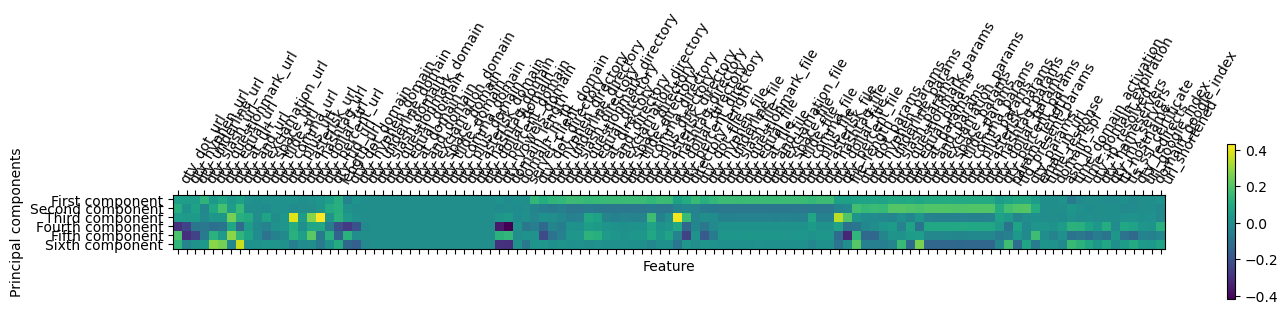

In [35]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4, 5], ["First component", "Second component", "Third component", 
                                "Fourth component", "Fifth component", "Sixth component"])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [32]:
X_train.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened'],
      dtype='object', length=111)

# make_pipeline

In [26]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)

print("Pipeline Steps:\n", pipe.steps)
print("Train Score: {:.5f}".format(pipe.score(X_train,y_train)))
print("Test Score: {:.5f}".format(pipe.score(X_test,y_test)))

Pipeline Steps:
 [('standardscaler', StandardScaler()), ('pca', PCA(n_components=6)), ('logisticregression', LogisticRegression(max_iter=1000))]
Train Score: 0.86574
Test Score: 0.86716
